## Lab | Imbalanced data ##
Antonio Montilla

We will be using the files_for_lab/customer_churn.csv dataset to build a churn predictor.

#### 1. Load the dataset and explore the variables. ####

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#importing the dataset
customer = pd.read_csv("customer_churn.csv")
display(customer.head())
display(customer.shape)
display(customer.columns)

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

(7043, 21)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

#### 2. We will try to predict variable Churn using a logistic regression on variables tenure, SeniorCitizen,MonthlyCharges. ####

In [5]:
#creating the data to be used in the model, as instructed
data = customer[['Churn', 'tenure', 'SeniorCitizen', 'MonthlyCharges']]

In [7]:
#initial data exploration
display(data.head())
display(data.shape)
display(data.dtypes)
display(data.describe().T)

Churn  tenure  SeniorCitizen  MonthlyCharges
0    No       1              0           29.85
1    No      34              0           56.95
2   Yes       2              0           53.85
3    No      45              0           42.30
4   Yes       2              0           70.70

(7043, 4)

Churn              object
tenure              int64
SeniorCitizen       int64
MonthlyCharges    float64
dtype: object

count       mean        std    min   25%    50%    75%  \
tenure          7043.0  32.371149  24.559481   0.00   9.0  29.00  55.00   
SeniorCitizen   7043.0   0.162147   0.368612   0.00   0.0   0.00   0.00   
MonthlyCharges  7043.0  64.761692  30.090047  18.25  35.5  70.35  89.85   

                   max  
tenure           72.00  
SeniorCitizen     1.00  
MonthlyCharges  118.75

In [8]:
#Looking first at sum of NaNs
data.isna().sum()



Churn             0
tenure            0
SeniorCitizen     0
MonthlyCharges    0
dtype: int64

In [9]:
#checking the distribution of the target variable 'Churn'
data['Churn'].value_counts()
#This preliminary assessment already hints the precense of imbalance data...

No     5174
Yes    1869
Name: Churn, dtype: int64

/var/folders/ws/0xbhg9d95hd9g5nvrfz8pwk40000gn/T/ipykernel_30883/1071990472.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['tenure'])


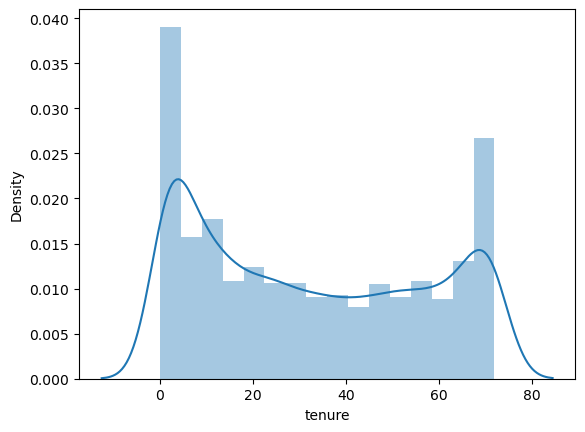

/var/folders/ws/0xbhg9d95hd9g5nvrfz8pwk40000gn/T/ipykernel_30883/1071990472.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['MonthlyCharges'])


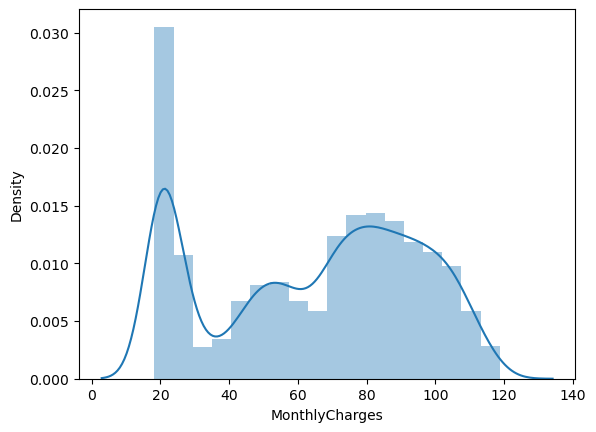

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [14]:
#checking briefly the distribution of the X variables
#Tenure
sns.distplot(data['tenure'])
plt.show()

#Monthly charges
sns.distplot(data['MonthlyCharges'])
plt.show()

#SeniorCitizen
data['SeniorCitizen'].value_counts()

#### 3. Split the Dataset into X ('tenure', 'SeniorCitizen', 'MonthlyCharges') and y ('Churn') ####

In [15]:
# X/y split
X = data.drop('Churn',axis = 1)
y = data['Churn']

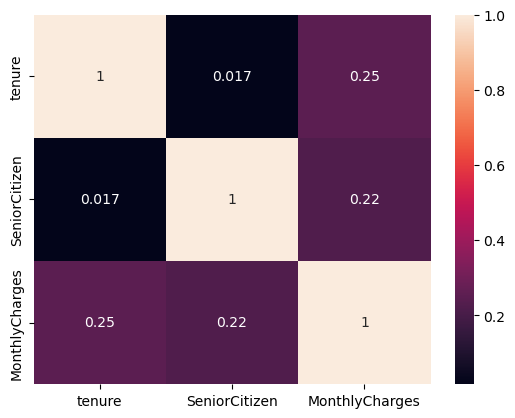

In [16]:
#checking for multicolinearity
correlations_matrix = X.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()
#the correlation matrix does not suggest precense of multicolinearity among Xs

In [17]:
#Train-test-split before scaling X_num
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# all features are numeric, so no need to split into _num and _cat
#scaling X_train
from sklearn.preprocessing import MinMaxScaler
transformer = MinMaxScaler().fit(X_train)
X_train_scaled_arr = transformer.transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled_arr, columns=X_train.columns)
display(X_train_scaled.head())
# now doing scale for X_test also
X_test_scaled = pd.DataFrame(transformer.transform(X_test),columns=X.columns)
X_test_scaled.head()

tenure  SeniorCitizen  MonthlyCharges
0  0.291667            0.0        0.464375
1  0.750000            0.0        0.786746
2  0.013889            0.0        0.051819
3  0.055556            0.0        0.517688
4  0.000000            0.0        0.434978

tenure  SeniorCitizen  MonthlyCharges
0  0.013889            0.0        0.065272
1  0.569444            0.0        0.069756
2  0.722222            0.0        0.010962
3  0.013889            0.0        0.578974
4  0.930556            0.0        0.321873

In [22]:
#checking SeniorCitizen to see if scaling did not mess it up
display(X_train_scaled['SeniorCitizen'].value_counts())
display(X_train['SeniorCitizen'].value_counts())

0.0    4728
1.0     906
Name: SeniorCitizen, dtype: int64

0    4728
1     906
Name: SeniorCitizen, dtype: int64

In [24]:
#checking y_train and resetting index, in preparation for re-sampling later on:
display(y_train.head())
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

2142     No
1623     No
6074    Yes
1362    Yes
6754     No
Name: Churn, dtype: object

In [32]:
display(y_train.head())
display(y_test.head())

0     No
1     No
2    Yes
3    Yes
4     No
Name: Churn, dtype: object

0    Yes
1     No
2     No
3    Yes
4     No
Name: Churn, dtype: object

#### 4. Build the logistic regression model. ####

In [26]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(X_train_scaled, y_train)

LogisticRegression(random_state=0)

In [27]:
LR.predict_proba(X_train_scaled)

array([[0.71317004, 0.28682996],
       [0.84319759, 0.15680241],
       [0.74683136, 0.25316864],
       ...,
       [0.84841088, 0.15158912],
       [0.23910814, 0.76089186],
       [0.92351195, 0.07648805]])

#### 5. Evaluate the model. ####

In [33]:
LR.score(X_test_scaled, y_test)

0.8041163946061036

In [48]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

pred = LR.predict(X_test_scaled)

pred
print("precision: ",precision_score(y_test,pred, pos_label='Yes'))
print("recall: ",recall_score(y_test,pred,pos_label='Yes'))
print("f1: ",f1_score(y_test,pred, pos_label='Yes'))

precision:  0.6932270916334662
recall:  0.46648793565683644
f1:  0.5576923076923076


In [49]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[959,  77],
       [199, 174]])

#### 6. Even a simple model will give us more than 70% accuracy. Why? ####

- As observed in the preliminary exploration of the data (value_counts the target variable), the model gets a very high accuracy performance but mainly due to the number of 'No' category in the Churn column, that is the number of people who were actually not classified as a churn. 
- In fact, out of the 1128 of positive predictions (ie True negatives + True positives), 85% are 'No' predictions.
- The relative low level of the recall metric is a reflection of this imbalance, confirming the model is not really performing well when trying to identify customers as churn. It is over-representing the potential 'No' outcomes, mainly as reflection of the imbalance in the original data

#### 7. Apply imblearn.over_sampling.SMOTE to the dataset. Build and evaluate the logistic regression model. Is it there any improvement? ####

In [50]:
from imblearn.over_sampling import SMOTE

In [51]:
sm = SMOTE(random_state=100, k_neighbors=3)
X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train_scaled,y_train)

In [53]:
display(X_train_SMOTE.shape)
display(X_train.shape)

(8276, 3)

(5634, 3)

In [54]:
LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(X_train_SMOTE, y_train_SMOTE)
pred = LR.predict(X_test_scaled)

print("precision: ",precision_score(y_test,pred, pos_label='Yes'))
print("recall: ",recall_score(y_test,pred,pos_label='Yes'))
print("f1: ",f1_score(y_test,pred, pos_label='Yes'))

precision:  0.5125448028673835
recall:  0.7667560321715817
f1:  0.6143931256713211


In [55]:
LR.score(X_test_scaled, y_test)

0.7452093683463449

In [57]:
confusion_matrix(y_test,pred)

array([[764, 272],
       [ 87, 286]])

- Applying imblearn.over_sampling.SMOTE to the dataset does indeed improve the model's performance to estimate customers that are classified as Churn, with the true negatives improving from 174 to 286.
- This implied that the recall metric improved from 0.46 to 0.76.
- On the other hand, the model lost some of its ability to predict customers that are NOT churns, with the true positives falling from 959 to 764 (there nearly 200 additional customers that the model classified wrongly as churns compared to the previous version).
- This reflected in a decline in the accuracy ratio (R) to 0.74 from 0.80, while the precision metric also drops significantly.
- Will try to see if performing oversampling or undersampling could improve on these results

#### Oversampling

In [66]:
from sklearn.utils import resample

In [74]:
# first will concatenate  X_train & y_train
train = pd.concat([X_train_scaled, y_train],axis=1)
train.head()

tenure  SeniorCitizen  MonthlyCharges Churn
0  0.291667            0.0        0.464375    No
1  0.750000            0.0        0.786746    No
2  0.013889            0.0        0.051819   Yes
3  0.055556            0.0        0.517688   Yes
4  0.000000            0.0        0.434978    No

In [75]:
train['Churn'].value_counts()

No     4138
Yes    1496
Name: Churn, dtype: int64

In [76]:
# separate majority/minority classes
no_churn = train[train['Churn']=='No']
yes_churn = train[train['Churn']=='Yes']

In [77]:
display(no_churn.shape)
display(yes_churn.shape)

(4138, 4)

(1496, 4)

In [67]:
# oversample minority
yes_churn_oversampled = resample(yes_churn, replace=True, n_samples = len(no_churn), random_state=0)

In [79]:
display(yes_churn_oversampled.shape)
display(no_churn.shape)

(4138, 4)

(4138, 4)

In [83]:
#combining the two sets
train_oversampled = pd.concat([no_churn,yes_churn_oversampled],axis=0)
display(train_oversampled.head())
display(train_oversampled.shape)
display(train_oversampled['Churn'].value_counts())

tenure  SeniorCitizen  MonthlyCharges Churn
0  0.291667            0.0        0.464375    No
1  0.750000            0.0        0.786746    No
4  0.000000            0.0        0.434978    No
5  0.097222            0.0        0.511211    No
6  0.444444            0.0        0.006976    No

(8276, 4)

No     4138
Yes    4138
Name: Churn, dtype: int64

In [84]:
#splitting X and Y
y_train_over = train_oversampled['Churn'].copy()
X_train_over = train_oversampled.drop('Churn',axis = 1).copy()

In [86]:
LR_over = LogisticRegression(random_state=0, solver='lbfgs')
LR_over.fit(X_train_over, y_train_over)
pred = LR_over.predict(X_test_scaled)

print("precision: ",precision_score(y_test,pred, pos_label='Yes'))
print("recall: ",recall_score(y_test,pred,pos_label='Yes'))
print("f1: ",f1_score(y_test,pred, pos_label='Yes'))

precision:  0.5134168157423972
recall:  0.7694369973190348
f1:  0.6158798283261803


In [87]:
confusion_matrix(y_test,pred)

array([[764, 272],
       [ 86, 287]])

- Applying oversampling improve only marginally the performance of the model, obtaining 1 extra false positive versus the model with imblearn.over_sampling.SMOTE.
- Will now compare it with a model based on undersampling data

#### Undersampling

In [88]:
# undersampling majority now
no_churn_undersampled = resample(no_churn, replace=False, n_samples = len(yes_churn), random_state=0)

In [89]:
# checking shapes
display(yes_churn.shape)
display(no_churn_undersampled.shape)

(1496, 4)

(1496, 4)

In [90]:
train_undersampled = pd.concat([yes_churn,no_churn_undersampled], axis=0)
display(train_undersampled.head())
display(train_undersampled.shape)

tenure  SeniorCitizen  MonthlyCharges Churn
2   0.013889            0.0        0.051819   Yes
3   0.055556            0.0        0.517688   Yes
8   0.263889            0.0        0.213254   Yes
10  0.291667            1.0        0.506726   Yes
26  0.111111            1.0        0.735924   Yes

(2992, 4)

In [91]:
y_train_under = train_undersampled['Churn'].copy()
X_train_under = train_undersampled.drop('Churn',axis = 1).copy()

In [92]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(X_train_under, y_train_under)
pred = LR.predict(X_test_scaled)

print("precision: ",precision_score(y_test,pred, pos_label='Yes'))
print("recall: ",recall_score(y_test,pred,pos_label='Yes'))
print("f1: ",f1_score(y_test,pred, pos_label='Yes'))

precision:  0.5115452930728241
recall:  0.7721179624664879
f1:  0.6153846153846153


In [93]:
confusion_matrix(y_test,pred)

array([[761, 275],
       [ 85, 288]])

- When applying undersampling, the number of true negative also improves by 1 observation.
- However, the model also loses predicting power for estimating a customer is not a churn, with 3 less true positive observations.
- Overall, there are no significant differences between these methods. At the margin, it seems that oversampling could be the best approach.